Synthetic case CA-ST (diffusion only)(avg from data noise) (06 may, no additional data, this one with additional data)

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import ipyplot
from advection_diffusion_inference_utils import (read_experiment_data,
                                                 build_grids,
                                                 plot_time_series)
import cuqi


In [5]:
def matplotlib_setup(SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE):
    plt.rc('font', size=MEDIUM_SIZE)         # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title 

In [2]:
list_CASTSynthDiff = np.array(['../../../Collab-BrainEfflux-Data/v21May2024_c//outputm1_r_NUTS_sampleMean_m1:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5/experiment_m1_r_NUTS_sampleMean_m1:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5.png',
       '../../../Collab-BrainEfflux-Data/v21May2024_c//outputm4_l_NUTS_sampleMean_m4:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5/experiment_m4_l_NUTS_sampleMean_m4:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5.png',
       '../../../Collab-BrainEfflux-Data/v21May2024_c//outputm1_l_NUTS_sampleMean_m1:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5/experiment_m1_l_NUTS_sampleMean_m1:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5.png',
       '../../../Collab-BrainEfflux-Data/v21May2024_c//outputm4_r_NUTS_sampleMean_m4:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5/experiment_m4_r_NUTS_sampleMean_m4:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5.png',
       '../../../Collab-BrainEfflux-Data/v21May2024_c//outputm3_r_NUTS_sampleMean_m3:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5/experiment_m3_r_NUTS_sampleMean_m3:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5.png',
       '../../../Collab-BrainEfflux-Data/v21May2024_c//outputm6_r_NUTS_sampleMean_m6:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5/experiment_m6_r_NUTS_sampleMean_m6:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5.png',
       '../../../Collab-BrainEfflux-Data/v21May2024_c//outputm3_l_NUTS_sampleMean_m3:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5/experiment_m3_l_NUTS_sampleMean_m3:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5.png'])

print(len(list_CASTSynthDiff))

7


In [8]:

ipyplot.plot_images(list_CASTSynthDiff, img_width=800/3)

Corresponding real ones (but 0.2 noise): CA-ST (diffusion only)

In [12]:
list_CASTRealDiff = np.array(['../../../Collab-BrainEfflux-Data/April_2x_2024_b//outputm6_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5/experiment_m6_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5.png',
       '../../../Collab-BrainEfflux-Data/April_2x_2024_b//outputm4_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5/experiment_m4_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5.png',
       '../../../Collab-BrainEfflux-Data/April_2x_2024_b//outputm1_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5/experiment_m1_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5.png',
       '../../../Collab-BrainEfflux-Data/April_2x_2024_b//outputm3_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5/experiment_m3_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5.png',
       '../../../Collab-BrainEfflux-Data/April_2x_2024_b//outputm1_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5/experiment_m1_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5.png',
       '../../../Collab-BrainEfflux-Data/April_2x_2024_b//outputm6_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5/experiment_m6_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5.png'])

print(len(list_CASTRealDiff))

6


In [13]:
ipyplot.plot_images(list_CASTRealDiff, img_width=800/3)

All the cases / noise level from data average variance / Sampler NUTS / 3000 samples / ~12 hrs:

### Inverse:
1. CA (diffusion only)
    - 1.1. synthetic (m1-l) : 4 cases
        - constant/constant
        - constant/varying
        - varying/constant
        - varying/varying
    - 1.2. real (all mice, all ears) : 8 cases
        - varying


2. CA-ST (diffusion only)
    - 2.1 synthetic (m1-l) : 1 case
        - varying
    - 2.2 real (all mice, all ears) : 8 cases
        - varying

3. CA (advection-diffusion)
    - 3.1 synthetic (m1-l) : 2 cases
        - varying/small_a/varying
        - varying/large_a/varying
    - 3.2 real (all mice, all ears) : 8 cases
        - varying

Total number of cases: 4+ 8+ 1+ 8+ 2+ 8 = 31
Number of runs: 4 major runs: 
Create table
| Case | Number of runs | label | notes: | running? |
| --- | --- | --- | --- | --- |
| 1.1 | 4 | v14septCASynthDiff | | yes 9:00 am (2 done, 1 is running that is extra not needed) (results9)|
| 1.2 | 10? or 8 | v14septCARealDiff | | yes 11:54 (results11) |
| <font color='red'>2.1 </font> | 10? or 8 | v14septCASTSynthDiff | it is okay to use old results, list_CASTSynthDiff above| yes 12:38 (results13) |
| <font color='red'>2.2 </font> | 10? or 8 | v14septCASTRealDiff | it is okay to use old results, list_CASTRealDiff above| yes 1:22 (results15) |
| <font color='green'>3.1 </font> | 2 | v14septCASynthAdvDiff | | yes 7:30 am (results8) |
| 3.2 | 10? or 8 | v14septCARealAdvDiff | | yes 11:40 (results10) |

**note**

results12 and results14 on hpc cluster can be deleted.


### Forward:
- Multiple advection for various Peclet numbers
- 2D photo of solution? or video?

### Analysis:
- The things I normally show (for at least one case)
- Look at the average mouse (1.2)
- The average mouse results
- Correlation between average diffusivity and a
- Table of errors in data / in reconstruction. The latter is for the synthetic cases.

### Error in estimation: (only heterogenous diffusivity and heterogenous inference)

Synth:
| Case | Error in data | Recon. error (diffusivity) | Recon. error (advection) | STD norm |
| --- | --- | --- | --- | --- |
| CA (diffusion only) |  |  |  |  |
| CA-ST (diffusion only)(avg mice) |  |  |  |  |
| CA-ST (diffusion only)(avg max mice) |  |  |  |  |
| CA-ST (diffusion only)(avg min mice) |  |  |  |  |
| CA (advection-diffusion) (small a) |  |  |  |  |
| CA (advection-diffusion) (large a) |  |  |  |  |

Real:

| Case | Error in data | STD norm |
| --- | --- | --- |
| CA (diffusion only)(avg mice) |  |  |
| CA (diffusion only)(max mice) | number / mouse and ear |  |
| CA (diffusion only)(min mice) |  |  |
| CA-ST (diffusion only)(avg mice) |  |  |
| CA-ST (diffusion only)(max mice) |  |  |
| CA-ST (diffusion only)(min mice) |  |  |
| CA (advection-diffusion) (avg mice) |  |  |
| CA (advection-diffusion) (max mice) |  |  |
| CA (advection-diffusion) (min mice) |  |  |


- define error in data
- define error in reconstruction for both diffusivity and advection


## 2. CA-ST (diffusion only)

### 2.1 synthetic (m1-l) : 1 case (varying)


1. Read data files

<div style="border: 2px solid #FFB74D; background-color: #FFF3E0; border-radius: 8px; padding: 10px; font-family: Arial, sans-serif; color: #333; box-shadow: 2px 2px 8px rgba(0, 0, 0, 0.1); max-width: 750px; margin: 0 auto;">
  <strong style="color: #E65100;">⚠️ Note:</strong> 
  These results will be updated

  plot ess in the 8th panel
</div>

In [80]:
list_CASTSynthDiff = ['../../../Collab-BrainEfflux-Data/v21May2024_c/']*7
idx_list = [2, 0, 6, 4, 1, 3, 5]
list_CASTSynthDiff_tags = ["m1_r_NUTS_sampleMean_m1:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5",
                           "m4_l_NUTS_sampleMean_m4:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5",
                           "m1_l_NUTS_sampleMean_m1:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5",
                           "m4_r_NUTS_sampleMean_m4:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5",
                           "m3_r_NUTS_sampleMean_m3:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5",
                           "m6_r_NUTS_sampleMean_m6:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5",
                           "m3_l_NUTS_sampleMean_m3:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5"]


print(len(list_CASTSynthDiff))

7


In [82]:
# order file names
list_CASTSynthDiff = [list_CASTSynthDiff[idx] for idx in idx_list]
list_CASTSynthDiff_tags = [list_CASTSynthDiff_tags[idx] for idx in idx_list]


In [83]:


# read the data
data_dict_list = []
for i in range(len(list_CASTSynthDiff)):
    data_dict_list.append(read_experiment_data(list_CASTSynthDiff[i], list_CASTSynthDiff_tags[i]))



Reading file:  ../../../Collab-BrainEfflux-Data/v21May2024_c//outputm1_l_NUTS_sampleMean_m1:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5/m1_l_NUTS_sampleMean_m1:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5_var.pkl
Reading file:  ../../../Collab-BrainEfflux-Data/v21May2024_c//outputm1_r_NUTS_sampleMean_m1:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5/m1_r_NUTS_sampleMean_m1:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5_var.pkl
Reading file:  ../../../Collab-BrainEfflux-Data/v21May2024_c//outputm3_l_NUTS_sampleMean_m3:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFro

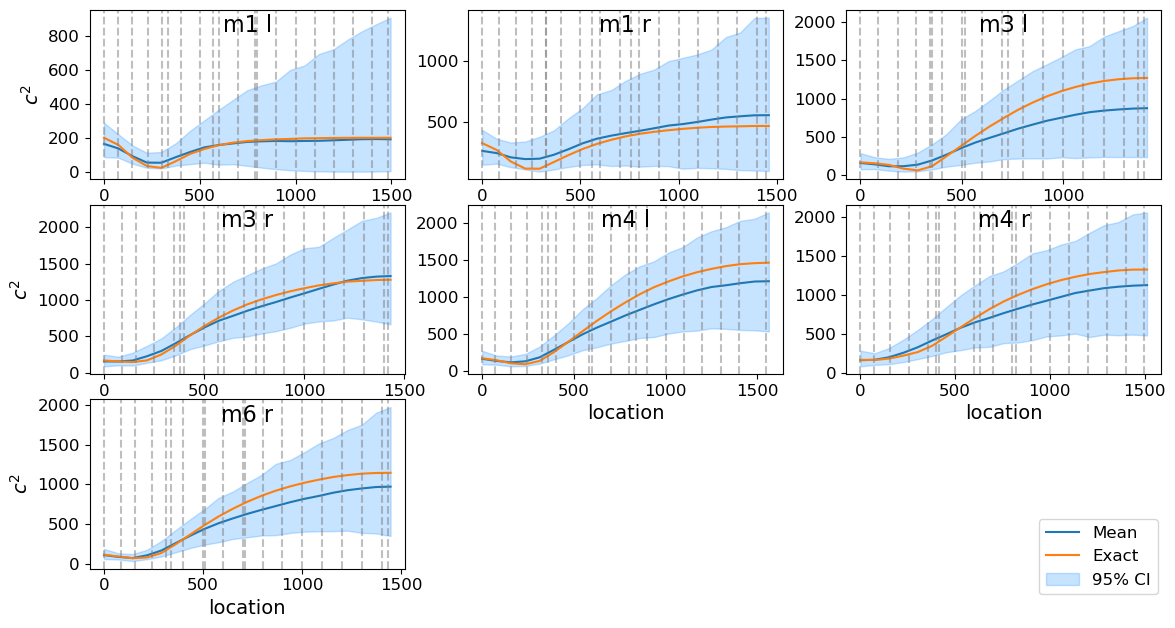

In [120]:
matplotlib_setup(12, 14, 16)

# powerpoint slide size in inches: 13.333 x 7.5 (widescreeen)
# obtain samples and plot the ci
samples_list = []
exact_list = []
locations_list = []
ess_list = []
for data_dict in data_dict_list:
    samples_list.append(data_dict['samples'])
    ess_list.append(samples_list[-1].compute_ess())
    exact_list.append(data_dict['exact'])
    locations_list.append(data_dict['locations'])


#Create a 3 by 3 grid of plots
fig, axs = plt.subplots(3, 3, figsize=(12, 6.5))
#Plot the first 7 samples in
for i in range(3):
    for j in range(3):
        idx = 3*i+j
        if idx == len(samples_list):
            # clear the axis
            axs[i, j].axis('off')
        elif idx > len(samples_list): 
            # plot legend
            plt.sca(axs[i, j])
            axs[i, j].axis('off')
            plt.legend(fig_ifo, ['Mean', 'Exact', '95% CI'], loc='lower center', bbox_to_anchor=(0.8, -0.2))
        else:
        
            samples = samples_list[idx]
            exact = exact_list[idx]
            plt.sca(axs[i, j])
            fig_ifo = samples.plot_ci(exact=exact)
            # plot vertical gray lines at the locations
            for location in locations_list[idx]:
                plt.axvline(x=location, color='gray', linestyle='--', alpha=0.5)
            # turn off the legend
            plt.legend().set_visible(False)
            # turn off x-axis label for all figures except image 5,6,7
            # which mouse, which ear
            plt.title(
                list_CASTSynthDiff_tags[idx].split('_')[0] + ' ' + list_CASTSynthDiff_tags[idx].split('_')[1],
                x=0.5, y=0.82)

# remove y ticks 
# add x label for (1,1), (1,2), (2,1)
axs[1, 1].set_xlabel('location')
axs[1, 2].set_xlabel('location')
axs[2, 0].set_xlabel('location')

# y label for (0,0), (1,0), (2,0)
axs[0, 0].set_ylabel('$c^2$')
axs[1, 0].set_ylabel('$c^2$')
axs[2, 0].set_ylabel('$c^2$')

# tighten the figure
plt.tight_layout()
# remove white space
plt.subplots_adjust(wspace=0.2, hspace=0.15)


In [130]:
#min max avg

print('min ess:', np.min(ess_list))
print('max ess:', np.max(ess_list))
print('avg ess:', np.mean(ess_list))

min ess: 84.94432988442037
max ess: 1184.2933944150273
avg ess: 180.7413868964989


###  2.2 real (all mice, all ears) : 8 cases (varying)

In [121]:

list_CASTRealDiff = ['../../../Collab-BrainEfflux-Data/April_2x_2024_b/']*6

# tags ordered by mouse and ear
list_CASTRealDiff_tags = ['m1_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5',
                          'm1_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5',
                          'm3_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5',
                          'm4_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5',
                          'm6_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5',
                          'm6_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5']

print(len(list_CASTRealDiff))

6


In [122]:
# read the data
CASTRealDiff_dict_list = []
for i in range(len(list_CASTRealDiff)):
    CASTRealDiff_dict_list.append(read_experiment_data(list_CASTRealDiff[i], list_CASTRealDiff_tags[i]))

Reading file:  ../../../Collab-BrainEfflux-Data/April_2x_2024_b//outputm1_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5/m1_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5_var.pkl
Reading file:  ../../../Collab-BrainEfflux-Data/April_2x_2024_b//outputm1_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5/m1_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5_var.pkl
Reading file:  ../../../Collab-BrainEfflux-Data/April_2x_2024_b//outputm3_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5/m3_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5_var.pkl
Reading file:  ../../../Collab-BrainEfflux-Data/April_2x_2024_b//outputm4_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5/m4_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5_var.pkl
Reading file:  ../../../Collab-BrainEfflux-Data/April_2x_2024_b//outputm6_l_NUTS_con

In [123]:
# powerpoint slide size in inches: 13.333 x 7.5 (widescreeen)
# obtain samples and plot the ci
samples_list = []
exact_list = []
locations_list = []
ess_list = []
for data_dict in CASTRealDiff_dict_list:
    samples_list.append(data_dict['samples'])
    ess_list.append(samples_list[-1].compute_ess())
    exact_list.append(data_dict['exact'])
    locations_list.append(data_dict['locations'])

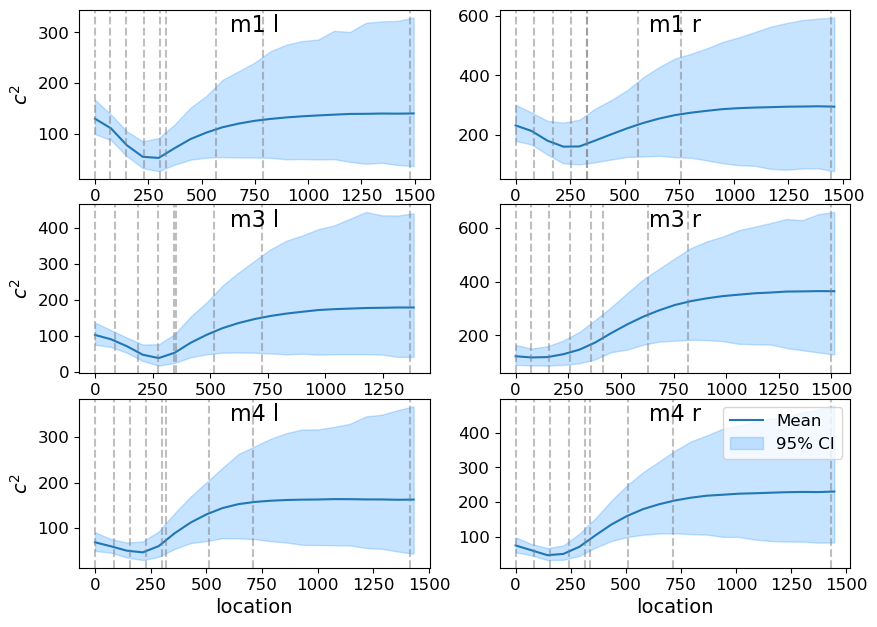

In [128]:
matplotlib_setup(12, 14, 16)




#Create a 3 by 3 grid of plots
fig, axs = plt.subplots(3, 2, figsize=(9, 6.5))
#Plot the first 7 samples in
for i in range(3):
    for j in range(2):
        idx = 2*i+j

        if True:
        
            samples = samples_list[idx]
            exact = exact_list[idx]
            plt.sca(axs[i, j])
            fig_ifo = samples.plot_ci()
            # plot vertical gray lines at the locations
            for location in locations_list[idx]:
                plt.axvline(x=location, color='gray', linestyle='--', alpha=0.5)
            # turn off the legend
            if idx != 5:
                plt.legend().set_visible(False)
            else:
                plt.legend([fig_ifo[0], fig_ifo[2]], ['Mean', '95% CI'])#, loc='lower center', bbox_to_anchor=(0.8, -0.2))
            # turn off x-axis label for all figures except image 5,6,7
            # which mouse, which ear
            plt.title(
                list_CASTSynthDiff_tags[idx].split('_')[0] + ' ' + list_CASTSynthDiff_tags[idx].split('_')[1],
                x=0.5, y=0.82)

# remove y ticks 
# add x label for (1,1), (1,2), (2,1)
axs[2, 0].set_xlabel('location')
axs[2, 1].set_xlabel('location')


# y label for (0,0), (1,0), (2,0)
axs[0, 0].set_ylabel('$c^2$')
axs[1, 0].set_ylabel('$c^2$')
axs[2, 0].set_ylabel('$c^2$')

# tighten the figure
plt.tight_layout()
# remove white space
plt.subplots_adjust(wspace=0.2, hspace=0.15)


In [127]:
fig_ifo

 None,

## 3. CA (advection-diffusion)

### 3.1 synthetic (m1-l) : 2 cases (varying/small_a/varying, varying/large_a/varying)

<div style="border: 2px solid #FFB74D; background-color: #FFF3E0; border-radius: 8px; padding: 10px; font-family: Arial, sans-serif; color: #333; box-shadow: 2px 2px 8px rgba(0, 0, 0, 0.1); max-width: 750px; margin: 0 auto;">
  <strong style="color: #E65100;">⚠️ Note:</strong> 
  Use small a results when it is ready
</div>

In [77]:
v14septCASynthAdvDiff_dir = ['../../../Collab-BrainEfflux-Data/results8/']*2
v14septCASynthAdvDiff_tags = ['m1_l_NUTS_custom_1_100.0_syntheticFromDiffusion_advection_diffusion_3000_fromDataAvg_v14septCASynthAdvDiff__0_5_0.9_zero']*2
 

In [78]:
#read the data files
v14septCASynthAdvDiff_dict_list = []
for i in range(len(v14septCASynthAdvDiff_dir)):
    v14septCASynthAdvDiff_dict_list.append(read_experiment_data(v14septCASynthAdvDiff_dir[i], v14septCASynthAdvDiff_tags[i]))

Reading file:  ../../../Collab-BrainEfflux-Data/results8//outputm1_l_NUTS_custom_1_100.0_syntheticFromDiffusion_advection_diffusion_3000_fromDataAvg_v14septCASynthAdvDiff__0_5_0.9_zero/m1_l_NUTS_custom_1_100.0_syntheticFromDiffusion_advection_diffusion_3000_fromDataAvg_v14septCASynthAdvDiff__0_5_0.9_zero_var.pkl
Reading file:  ../../../Collab-BrainEfflux-Data/results8//outputm1_l_NUTS_custom_1_100.0_syntheticFromDiffusion_advection_diffusion_3000_fromDataAvg_v14septCASynthAdvDiff__0_5_0.9_zero/m1_l_NUTS_custom_1_100.0_syntheticFromDiffusion_advection_diffusion_3000_fromDataAvg_v14septCASynthAdvDiff__0_5_0.9_zero_var.pkl


In [79]:
# extract the samples and exact values, etc
samples_list = []
exact_list = []
locations_list = []
ess_list = []
data_list = []
mean_recon_data_list = []
times_list = []
exact_data_list = []
for data_dict in v14septCASynthAdvDiff_dict_list:
    samples_list.append(data_dict['samples'])
    ess_list.append(samples_list[-1].compute_ess())
    exact_list.append(data_dict['exact'])
    locations_list.append(data_dict['locations'])
    data_list.append(data_dict['data'])
    mean_recon_data_list.append(data_dict['mean_recon_data'])
    times_list.append(data_dict['times'])
    exact_data_list.append(data_dict['exact_data'])

/var/folders/rr/13wqhtdj7bx5n5j3bfdhsz5r0000gn/T/ipykernel_38872/2324394638.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


['0', '72', '144', '229', '304']
([<matplotlib.lines.Line2D object at 0x19ef5f340>, <matplotlib.lines.Line2D object at 0x19ef5f5e0>, <matplotlib.lines.Line2D object at 0x19ef5f880>, <matplotlib.lines.Line2D object at 0x19ef5fb20>, <matplotlib.lines.Line2D object at 0x19ef5fdc0>], ['loc = 0.00', 'loc = 72.11', 'loc = 144.22', 'loc = 229.07', 'loc = 303.91'])


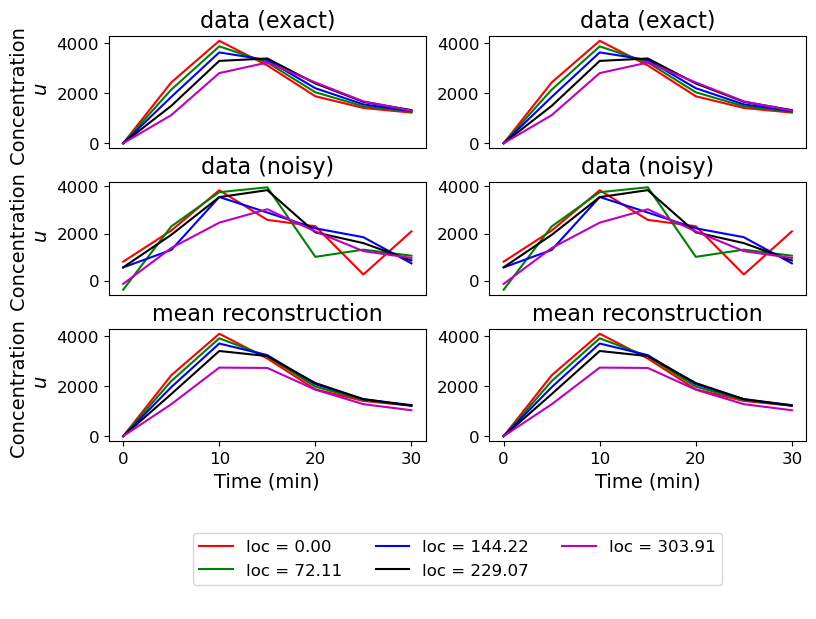

In [80]:
# Create a plot of 9 panels
#first row: noisy data, reconstruction, diffusion CI (large a)
#second row: noisy data, reconstruction, diffusion CI (small a)
#third row: PDF of advection (both) , ess (both) , empty

matplotlib_setup(12, 14, 16)




#Create a 3 by 3 grid of plots
# make 2 subplots to draw the legend in the bottom



fig= plt.figure( figsize=(9, 6.5))

subfigs = fig.subfigures(2, 1, height_ratios=[4,1])

axs = subfigs[0].subplots(3, 2 , gridspec_kw=dict( bottom=0.1, hspace=0.3))
plt.sca(axs[0, 0])
lines = plot_time_series(times=times_list[0],
                 data=exact_data_list[0].reshape(data_list[0].shape),
                 locations=locations_list[0],
                 plot_legend=False)
plt.ylabel('Concentration \n $u$')
plt.title('data (exact)')
# turn of ticks
plt.xticks([])
plt.xlabel('')

plt.sca(axs[1, 0])
lines = plot_time_series(times=times_list[0],
                 data=data_list[0],
                 locations=locations_list[0],
                 plot_legend=False)
plt.ylabel('Concentration \n $u$')
plt.title('data (noisy)')
# turn of ticks
plt.xticks([])
plt.xlabel('')

plt.sca(axs[2, 0])
lines = plot_time_series(times=times_list[0],
                 data=mean_recon_data_list[0],
                 locations=locations_list[0],
                 plot_legend=False)
plt.ylabel('Concentration \n $u$')
plt.title('mean reconstruction')


plt.sca(axs[0, 1])
lines = plot_time_series(times=times_list[0],
                 data=exact_data_list[0].reshape(data_list[0].shape),
                 locations=locations_list[0],
                 plot_legend=False)
plt.ylabel('')
# turn of ticks
plt.xticks([])
plt.xlabel('')
plt.title('data (exact)')

plt.sca(axs[1, 1])
lines = plot_time_series(times=times_list[0],
                 data=data_list[0],
                 locations=locations_list[0],
                 plot_legend=False)
plt.ylabel('')
# turn of ticks
plt.xticks([])
plt.xlabel('')
plt.title('data (noisy)')


plt.sca(axs[2, 1])
lines = plot_time_series(times=times_list[0],
                 data=mean_recon_data_list[0],
                 locations=locations_list[0],
                 plot_legend=False)
plt.ylabel('')
plt.title('mean reconstruction')

plt.tight_layout()

# plot legend
axLegend = subfigs[1].subplots(1, 1)
plt.sca(axLegend)
plt.axis('off')
plt.legend(lines[0], lines[1], ncol=3, loc='center', bbox_to_anchor=(0.5, 0.5))
# ["{:.0f}".format(location_i) for location_i in locations_list[0]], loc='center', bbox_to_anchor=(0.5, 0.5))


# print locations formated 2 space after decimal point

print(["{:.0f}".format(location_i) for location_i in locations_list[0]])
    
print(lines)


WARNING L MIGHT NOT BE ACCURATE


Text(0.5, 0, 'location')

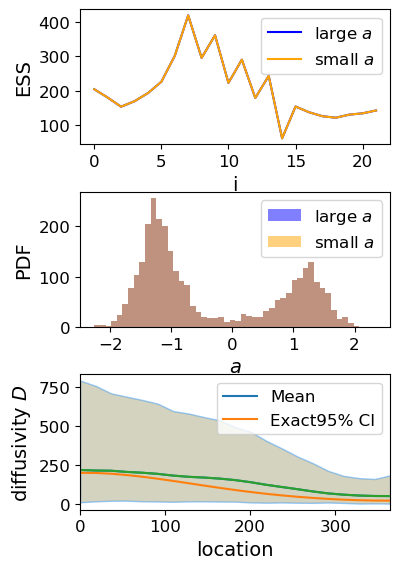

In [104]:
# Generate a figure with 3 rows and 1 column, top row is ESS for both cases, second row is PDF for both cases, diffusivity CI for both cases

fig, axs = plt.subplots(3, 1, figsize=(4, 6.5), gridspec_kw={'hspace':0.35})

# plot ESS
plt.sca(axs[0])
plt.plot(ess_list[0], label='large $a$', color='blue')
plt.plot(ess_list[1], label='small $a$', color='orange')
plt.ylabel('ESS')
plt.xlabel('i')
plt.legend()

# plot PDF
plt.sca(axs[1])
plt.hist(samples_list[0].samples[-1,:].flatten(), bins=50, alpha=0.5, label='large $a$', color='blue')
plt.hist(samples_list[1].samples[-1,:].flatten(), bins=50, alpha=0.5, label='small $a$', color='orange')

# annotate the mean
#plt.axvline(x=samples_list[0].samples[-1,:].mean(),
#             color='blue', linestyle='--')
#plt.axvline(x=samples_list[1].samples[-1,:].mean(),
#            color='orange', linestyle='--')
plt.ylabel('PDF')
plt.xlabel('advection speed $a$')
plt.xlabel('$a$')
plt.legend()

# plot diffusivity CI
plt.sca(axs[2])

print("WARNING L MIGHT NOT BE ACCURATE")
# PDE and coefficients grids
factor_L = 1.2 
L = locations_list[0][-1]*factor_L
coarsening_factor = 5
n_grid_c = 20


grid, grid_c, grid_c_fine, h, n_grid = build_grids(L, coarsening_factor, n_grid_c)
grid_c_geom = cuqi.geometry.MappedGeometry( cuqi.geometry.Continuous1D(grid_c), samples_list[0].geometry.map)
exact_new = cuqi.array.CUQIarray(exact_list[0].to_numpy()[:-1], geometry= grid_c_geom)
fig_ifo = cuqi.samples.Samples(samples_list[0].samples[:-1,:], geometry=grid_c_geom).plot_ci(exact=exact_new)
fig_ifo2 = cuqi.samples.Samples(samples_list[1].samples[:-1,:], geometry=grid_c_geom).plot_ci(plot_envelope_kwargs={'facecolor': 'orange'})
plt.xlim(0, L)

plt.legend(fig_ifo, ['Mean', 'Exact' '95% CI'])
plt.ylabel('diffusivity $D$')
plt.xlabel('location')




In [94]:

fig_ifo

 None,